# Tutorial - Step1 : MTMR pretraining with Metric learning

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from vae_triplet import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "logp06"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_6-1_{PROPERTY_NAME.upper()}_pretraining_m10"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             margin=10.,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 100.802  loss_recon_src(tr): 3.430  loss_recon_tar(tr): 3.432  loss_recon_neg(tr): 3.430  loss_kld(tr): 2.444  loss_triplet(tr): 9.664  valid_ratio(va): 0.105  similarity(va): 0.003
[00001000/00100000]  loss(tr): 41.029  loss_recon_src(tr): 0.706  loss_recon_tar(tr): 0.662  loss_recon_neg(tr): 0.688  loss_kld(tr): 21.936  loss_triplet(tr): 1.875
[00002000/00100000]  loss(tr): 46.775  loss_recon_src(tr): 0.592  loss_recon_tar(tr): 0.571  loss_recon_neg(tr): 0.627  loss_kld(tr): 22.343  loss_triplet(tr): 2.413
[00003000/00100000]  loss(tr): 47.565  loss_recon_src(tr): 0.614  loss_recon_tar(tr): 0.572  loss_recon_neg(tr): 0.570  loss_kld(tr): 22.299  loss_triplet(tr): 2.497
[00004000/00100000]  loss(tr): 38.304  loss_recon_src(tr): 0.598  loss_recon_tar(tr): 0.550  loss_recon_neg(tr): 0.569  loss_kld(tr): 22.628  loss_triplet(tr): 1.539
[00005000/00100000]  loss(tr): 40.712  loss_recon_src(tr): 0.566  loss_recon_tar(tr): 0.527  loss_recon_neg(tr): 0.564  los

[00048000/00100000]  loss(tr): 38.929  loss_recon_src(tr): 0.474  loss_recon_tar(tr): 0.460  loss_recon_neg(tr): 0.456  loss_kld(tr): 23.076  loss_triplet(tr): 1.562
[00049000/00100000]  loss(tr): 38.600  loss_recon_src(tr): 0.461  loss_recon_tar(tr): 0.439  loss_recon_neg(tr): 0.467  loss_kld(tr): 23.076  loss_triplet(tr): 1.530
[00050000/00100000]  loss(tr): 36.289  loss_recon_src(tr): 0.460  loss_recon_tar(tr): 0.437  loss_recon_neg(tr): 0.460  loss_kld(tr): 23.422  loss_triplet(tr): 1.264  valid_ratio(va): 1.000  similarity(va): 0.130
[00051000/00100000]  loss(tr): 36.280  loss_recon_src(tr): 0.472  loss_recon_tar(tr): 0.448  loss_recon_neg(tr): 0.463  loss_kld(tr): 22.963  loss_triplet(tr): 1.309
[00052000/00100000]  loss(tr): 36.026  loss_recon_src(tr): 0.479  loss_recon_tar(tr): 0.442  loss_recon_neg(tr): 0.476  loss_kld(tr): 23.052  loss_triplet(tr): 1.274
[00053000/00100000]  loss(tr): 34.788  loss_recon_src(tr): 0.477  loss_recon_tar(tr): 0.465  loss_recon_neg(tr): 0.490  los

[00096000/00100000]  loss(tr): 38.540  loss_recon_src(tr): 0.453  loss_recon_tar(tr): 0.436  loss_recon_neg(tr): 0.460  loss_kld(tr): 22.655  loss_triplet(tr): 1.566
[00097000/00100000]  loss(tr): 39.553  loss_recon_src(tr): 0.432  loss_recon_tar(tr): 0.417  loss_recon_neg(tr): 0.457  loss_kld(tr): 22.663  loss_triplet(tr): 1.667
[00098000/00100000]  loss(tr): 36.724  loss_recon_src(tr): 0.455  loss_recon_tar(tr): 0.446  loss_recon_neg(tr): 0.445  loss_kld(tr): 22.566  loss_triplet(tr): 1.393
[00099000/00100000]  loss(tr): 34.100  loss_recon_src(tr): 0.441  loss_recon_tar(tr): 0.418  loss_recon_neg(tr): 0.443  loss_kld(tr): 22.892  loss_triplet(tr): 1.099
[00100000/00100000]  loss(tr): 37.268  loss_recon_src(tr): 0.449  loss_recon_tar(tr): 0.433  loss_recon_neg(tr): 0.450  loss_kld(tr): 22.730  loss_triplet(tr): 1.432  valid_ratio(va): 1.000  similarity(va): 0.131


## 9. Visualize for loss analysis

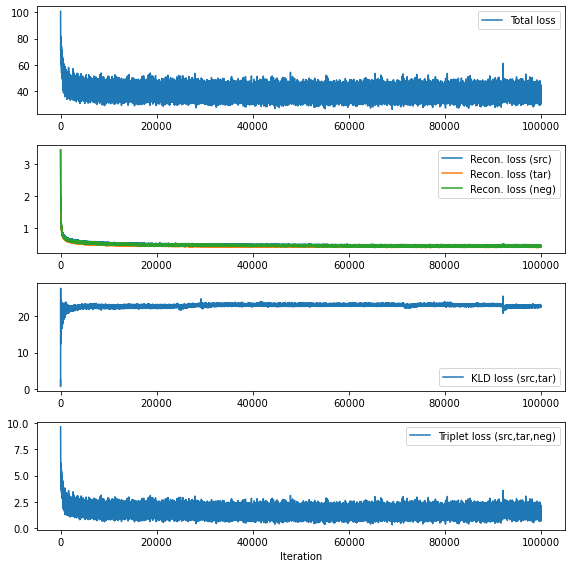

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_KL_DIVERGENCE"], label="KLD loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_TRIPLET"], label="Triplet loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

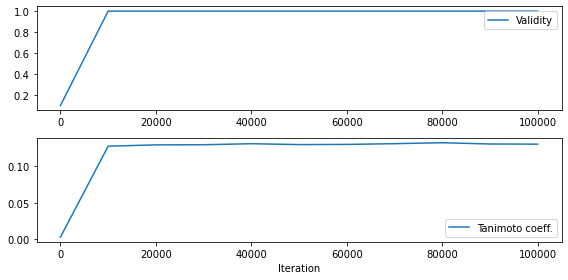

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()